In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
import torchvision
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
train_data = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
test_data = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

In [4]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [5]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [6]:
train_dl = DataLoader(train_data, batch_size=500, shuffle=True, num_workers=1)
test_dl = DataLoader(test_data, batch_size=500, shuffle=True, num_workers=1)

In [7]:
model = torchvision.models.resnet50()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(2048, 10, bias=True)
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
loss = nn.CrossEntropyLoss()
optimization = optim.SGD(model.parameters(), lr=0.01)
if(torch.cuda.is_available()):
    model = model.cuda()

In [10]:
from torch.autograd import Variable

def train(epochs, model, train_dl):
    total_steps=train_data.data.size()[0]
    model.train()
    
    for epoch in range(epochs+1):
        for i, (images, labels) in enumerate(train_dl):
            images_x, labels_x = images.to(device), labels.to(device)
            output = model(images_x)
            loss_value = loss(output, labels_x)
            optimization.zero_grad()
            loss_value.backward()
            optimization.step()
            
            if i % 100 == 0:
                print("Epoch: {} / {}, Step: {}/{} Loss: {:.4f}".format(epoch, epochs, i*len(images), len(train_dl.dataset), loss_value.item()))

In [11]:
train(10, model, train_dl)

Epoch: 0 / 10, Step: 0/60000 Loss: 2.5538
Epoch: 0 / 10, Step: 50000/60000 Loss: 0.6058
Epoch: 1 / 10, Step: 0/60000 Loss: 0.4363
Epoch: 1 / 10, Step: 50000/60000 Loss: 0.2516
Epoch: 2 / 10, Step: 0/60000 Loss: 0.1870
Epoch: 2 / 10, Step: 50000/60000 Loss: 0.1698
Epoch: 3 / 10, Step: 0/60000 Loss: 0.0903
Epoch: 3 / 10, Step: 50000/60000 Loss: 0.1218
Epoch: 4 / 10, Step: 0/60000 Loss: 0.0769
Epoch: 4 / 10, Step: 50000/60000 Loss: 0.0670
Epoch: 5 / 10, Step: 0/60000 Loss: 0.0332
Epoch: 5 / 10, Step: 50000/60000 Loss: 0.0478
Epoch: 6 / 10, Step: 0/60000 Loss: 0.0239
Epoch: 6 / 10, Step: 50000/60000 Loss: 0.0293
Epoch: 7 / 10, Step: 0/60000 Loss: 0.0109
Epoch: 7 / 10, Step: 50000/60000 Loss: 0.0087
Epoch: 8 / 10, Step: 0/60000 Loss: 0.0072
Epoch: 8 / 10, Step: 50000/60000 Loss: 0.0056
Epoch: 9 / 10, Step: 0/60000 Loss: 0.0044
Epoch: 9 / 10, Step: 50000/60000 Loss: 0.0048
Epoch: 10 / 10, Step: 0/60000 Loss: 0.0027
Epoch: 10 / 10, Step: 50000/60000 Loss: 0.0030


In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.cnn2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.linear = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = x.view(x.size(0), -1)
        output = self.linear(x)
        return output
cnn = CNN()
print(cnn)

CNN(
  (cnn1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Linear(in_features=1568, out_features=10, bias=True)
)


In [13]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_dl):
        train_output = model(images.to(device))
        pred_y = torch.max(train_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

1.0


In [14]:
model.eval()
all_labels = []
preds = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_dl):
        test_output = model(images.to(device))
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        all_labels.extend(labels)
        preds.extend(pred_y)
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

0.966


<AxesSubplot:>

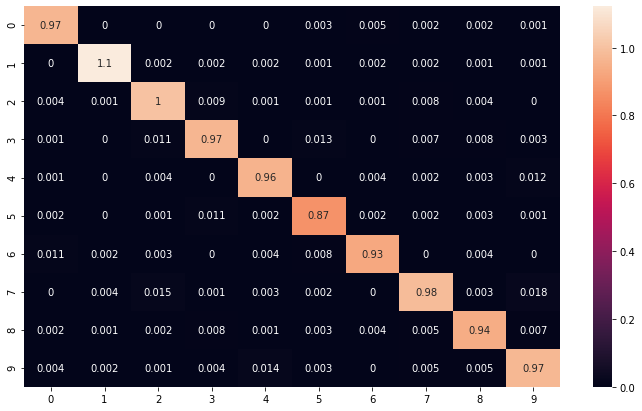

In [15]:
classes =('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
all_labels = torch.tensor(all_labels, device = 'cpu')
preds = torch.tensor(preds, device = 'cpu')
cf_matrix = confusion_matrix(all_labels, preds)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [16]:
import numpy as np
from mlxtend.data import loadlocal_mnist
import random
import cv2
import os

X, y_train = loadlocal_mnist(images_path='data/MNIST/raw/train-images-idx3-ubyte', labels_path='data/MNIST/raw/train-labels-idx1-ubyte')

if not os.path.isdir('data_56'):
    os.mkdir('data_56')
if not os.path.isdir('data_56/train'):
    os.mkdir('data_56/train')
for j in np.unique(y_train):
    if not os.path.isdir('data_56/train/'+str(j)):
        os.mkdir('data_56/train/'+str(j))
X_56_train = []
for i, image in enumerate(X):
    row = random.randint(0,27)
    col = random.randint(0,27)
    src = np.array(image)
    image = np.reshape(image, (28, 28))
    blank_image = np.zeros((56, 56), np.uint8)
    blank_image[row: row+28, col:col+28] = image
    X_56_train.append(blank_image.reshape(1, 56, 56))
    #cv2.imwrite('data_56/train/'+str(y_train[i])+'/'+str(i)+'.jpg', blank_image)
X_56_train = torch.Tensor(np.asarray(X_56_train))
y_train = torch.Tensor(y_train).type(torch.LongTensor)
X_56_train.size()

torch.Size([60000, 1, 56, 56])

In [17]:
X, y_test = loadlocal_mnist(images_path='data/MNIST/raw/t10k-images-idx3-ubyte', labels_path='data/MNIST/raw/t10k-labels-idx1-ubyte')

if not os.path.isdir('data_56/test'):
    os.mkdir('data_56/test')
for j in np.unique(y_test):
    if not os.path.isdir('data_56/test/'+str(j)):
        os.mkdir('data_56/test/'+str(j))
X_56_test = []
for i, image in enumerate(X):
    row = random.randint(0,27)
    col = random.randint(0,27)
    src = np.array(image)
    image = np.reshape(image, (28, 28, 1))
    blank_image = np.zeros((56, 56, 1), np.uint8)
    blank_image[row: row+28, col:col+28] = image
    X_56_test.append(blank_image.reshape(1, 56, 56))
    #cv2.imwrite('data_56/test/'+str(y_test[i])+'/'+str(i)+'.jpg', blank_image)
X_56_test = torch.Tensor(np.asarray(X_56_test))
y_test = torch.Tensor(y_test).type(torch.LongTensor)

In [18]:
train_data_56 = TensorDataset(X_56_train, y_train)
test_data_56 = TensorDataset(X_56_test, y_test)

In [19]:
train_56_dl = DataLoader(train_data_56, batch_size=100, shuffle=True, num_workers=1)
test_56_dl = DataLoader(test_data_56, batch_size=100, shuffle=True, num_workers=1)

In [ ]:
import torch.nn as nn

class CNN56(nn.Module):
    def __init__(self):
        super(CNN56, self).__init__()
        self.cnn1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.cnn2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.linear = nn.Linear(32*14*14, 10)
    
    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = x.view(x.size(0), -1)
        output = self.linear(x)
        return output
cnn56 = CNN56()
print(cnn56)

In [20]:
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

In [21]:
train(10, model, train_56_dl)

Epoch: 0 / 10, Step: 0/60000 Loss: 2.4071
Epoch: 0 / 10, Step: 10000/60000 Loss: 1.8796
Epoch: 0 / 10, Step: 20000/60000 Loss: 1.9000
Epoch: 0 / 10, Step: 30000/60000 Loss: 1.4178
Epoch: 0 / 10, Step: 40000/60000 Loss: 0.6713
Epoch: 0 / 10, Step: 50000/60000 Loss: 0.5793
Epoch: 1 / 10, Step: 0/60000 Loss: 0.4107
Epoch: 1 / 10, Step: 10000/60000 Loss: 0.2699
Epoch: 1 / 10, Step: 20000/60000 Loss: 0.1455
Epoch: 1 / 10, Step: 30000/60000 Loss: 0.2793
Epoch: 1 / 10, Step: 40000/60000 Loss: 0.0615
Epoch: 1 / 10, Step: 50000/60000 Loss: 0.1555
Epoch: 2 / 10, Step: 0/60000 Loss: 0.0750
Epoch: 2 / 10, Step: 10000/60000 Loss: 0.2496
Epoch: 2 / 10, Step: 20000/60000 Loss: 0.1312
Epoch: 2 / 10, Step: 30000/60000 Loss: 0.0515
Epoch: 2 / 10, Step: 40000/60000 Loss: 0.1131
Epoch: 2 / 10, Step: 50000/60000 Loss: 0.1158
Epoch: 3 / 10, Step: 0/60000 Loss: 0.0866
Epoch: 3 / 10, Step: 10000/60000 Loss: 0.0768
Epoch: 3 / 10, Step: 20000/60000 Loss: 0.1089
Epoch: 3 / 10, Step: 30000/60000 Loss: 0.0830
Epoc

In [22]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_56_dl):
        train_output = model(images.to(device))
        pred_y = torch.max(train_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

1.0


In [25]:
model.eval()
all_labels = []
preds = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_56_dl):
        test_output = model(images.to(device))
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        all_labels.extend(labels)
        preds.extend(pred_y)
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

1.0


<AxesSubplot:>

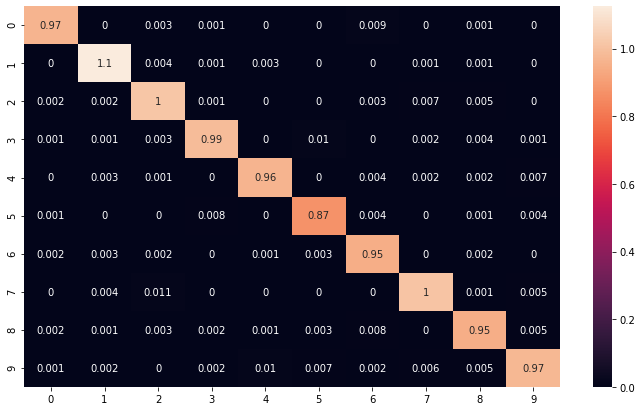

In [26]:
classes =('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
all_labels = torch.tensor(all_labels, device = 'cpu')
preds = torch.tensor(preds, device = 'cpu')
cf_matrix = confusion_matrix(all_labels, preds)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [27]:
from mlxtend.data import loadlocal_mnist
import os
import numpy as np
import random
import cv2

In [28]:
X, y_train = loadlocal_mnist(images_path='data/MNIST/raw/train-images-idx3-ubyte', labels_path='data/MNIST/raw/train-labels-idx1-ubyte')

if not os.path.isdir('data_56_top'):
    os.mkdir('data_56_top')
if not os.path.isdir('data_56_top/train'):
    os.mkdir('data_56_top/train')
for j in np.unique(y_train):
    if not os.path.isdir('data_56_top/train/'+str(j)):
        os.mkdir('data_56_top/train/'+str(j))
X_56_train = []
for i, image in enumerate(X):
    col = random.randint(0,27)
    src = np.array(image)
    image = np.reshape(image, (28, 28))
    blank_image = np.zeros((56, 56), np.uint8)
    blank_image[0:28, col:col+28] = image
    X_56_train.append(blank_image.reshape(1, 56, 56))
    #cv2.imwrite('data_56_top/train/'+str(y_train[i])+'/'+str(i)+'.jpg', blank_image)
X_56_train = torch.Tensor(np.asarray(X_56_train))
y_train = torch.Tensor(y_train).type(torch.LongTensor)
X_56_train.size()

torch.Size([60000, 1, 56, 56])

In [29]:
X, y_test = loadlocal_mnist(images_path='data/MNIST/raw/t10k-images-idx3-ubyte', labels_path='data/MNIST/raw/t10k-labels-idx1-ubyte')

if not os.path.isdir('data_56_top/test'):
    os.mkdir('data_56_top/test')
for j in np.unique(y_test):
    if not os.path.isdir('data_56_top/test/'+str(j)):
        os.mkdir('data_56_top/test/'+str(j))
X_56_test = []
for i, image in enumerate(X):
    col = random.randint(0,27)
    src = np.array(image)
    image = np.reshape(image, (28, 28, 1))
    blank_image = np.zeros((56, 56, 1), np.uint8)
    blank_image[28:57, col:col+28] = image
    X_56_test.append(blank_image.reshape(1, 56, 56))
    #cv2.imwrite('data_56_top/test/'+str(y_test[i])+'/'+str(i)+'.jpg', blank_image)
X_56_test = torch.Tensor(np.asarray(X_56_test))
y_test = torch.Tensor(y_test).type(torch.LongTensor)

In [30]:
train_data_56_top = TensorDataset(X_56_train, y_train)
test_data_56_top = TensorDataset(X_56_test, y_test)

In [31]:
train_56_dl_top = DataLoader(train_data_56_top, batch_size=100, shuffle=True, num_workers=1)
test_56_dl_top = DataLoader(test_data_56_top, batch_size=100, shuffle=True, num_workers=1)

In [32]:
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

In [35]:
train(2, model, train_56_dl_top)

Epoch: 0 / 2, Step: 0/60000 Loss: 0.0168
Epoch: 0 / 2, Step: 10000/60000 Loss: 0.0031
Epoch: 0 / 2, Step: 20000/60000 Loss: 0.0085
Epoch: 0 / 2, Step: 30000/60000 Loss: 0.0179
Epoch: 0 / 2, Step: 40000/60000 Loss: 0.0141
Epoch: 0 / 2, Step: 50000/60000 Loss: 0.0088
Epoch: 1 / 2, Step: 0/60000 Loss: 0.0032
Epoch: 1 / 2, Step: 10000/60000 Loss: 0.0020
Epoch: 1 / 2, Step: 20000/60000 Loss: 0.0052
Epoch: 1 / 2, Step: 30000/60000 Loss: 0.0016
Epoch: 1 / 2, Step: 40000/60000 Loss: 0.0020
Epoch: 1 / 2, Step: 50000/60000 Loss: 0.0038
Epoch: 2 / 2, Step: 0/60000 Loss: 0.0036
Epoch: 2 / 2, Step: 10000/60000 Loss: 0.0026
Epoch: 2 / 2, Step: 20000/60000 Loss: 0.0032
Epoch: 2 / 2, Step: 30000/60000 Loss: 0.0019
Epoch: 2 / 2, Step: 40000/60000 Loss: 0.0033
Epoch: 2 / 2, Step: 50000/60000 Loss: 0.0012


In [36]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_56_dl_top):
        train_output = model(images.to(device))
        pred_y = torch.max(train_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

1.0


In [46]:
model.eval()
all_labels = []
preds = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_56_dl_top):
        test_output = model(images.to(device))
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        all_labels.extend(labels)
        preds.extend(pred_y)
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

0.12


<AxesSubplot:>

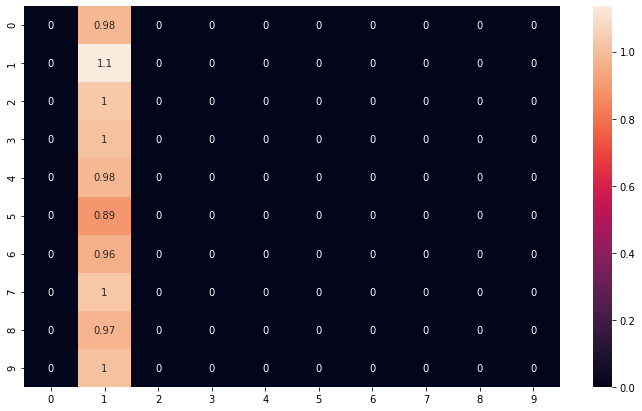

In [47]:
classes =('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
all_labels = torch.tensor(all_labels, device = 'cpu')
preds = torch.tensor(preds, device = 'cpu')
cf_matrix = confusion_matrix(all_labels, preds)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
import cv2

X, y_train = loadlocal_mnist(images_path='data/MNIST/raw/train-images-idx3-ubyte', labels_path='data/MNIST/raw/train-labels-idx1-ubyte')

if not os.path.isdir('data_56_blur'):
    os.mkdir('data_56_blur')
if not os.path.isdir('data_56_blur/train'):
    os.mkdir('data_56_blur/train')
for j in np.unique(y_train):
    if not os.path.isdir('data_56_blur/train/'+str(j)):
        os.mkdir('data_56_blur/train/'+str(j))

for i in range(0,10):
    path = "/s/chopin/a/grad/sanket96/Image Computation/data_56/train/"+str(i)
    for j in os.listdir(path):
        img = cv2.imread(path+"/"+j)
        image = cv2.blur(img, (5, 5))
        cv2.imwrite("/s/chopin/a/grad/sanket96/Image Computation/data_56_blur/train/"+str(i)+"/"+j, image)
y_train = torch.Tensor(y_train).type(torch.LongTensor)

In [ ]:
X, y_test = loadlocal_mnist(images_path='data/MNIST/raw/t10k-images-idx3-ubyte', labels_path='data/MNIST/raw/t10k-labels-idx1-ubyte')

if not os.path.isdir('data_56_blur'):
    os.mkdir('data_56_blur')
if not os.path.isdir('data_56_blur/test'):
    os.mkdir('data_56_blur/test')
for j in np.unique(y_test):
    if not os.path.isdir('data_56_blur/test/'+str(j)):
        os.mkdir('data_56_blur/test/'+str(j))

for i in range(0,10):
    path = "/s/chopin/a/grad/sanket96/Image Computation/data_56/test/"+str(i)
    for j in os.listdir(path):
        img = cv2.imread(path+"/"+j)
        image = cv2.blur(img, (5, 5))
        cv2.imwrite("/s/chopin/a/grad/sanket96/Image Computation/data_56_blur/test/"+str(i)+"/"+j, image)
y_test = torch.Tensor(y_test).type(torch.LongTensor)

In [38]:
train_set = datasets.ImageFolder('data_56/train', transform =  torchvision.transforms.Compose([torchvision.transforms.Grayscale(), torchvision.transforms.ToTensor()])
    )
test_set = datasets.ImageFolder('data_56_blur/test', transform =  torchvision.transforms.Compose([torchvision.transforms.Grayscale(), torchvision.transforms.ToTensor()])
    )

In [39]:
train_blur = DataLoader(train_set, batch_size=100, shuffle=True, num_workers=1)
test_blur = DataLoader(test_set, batch_size=100, shuffle=True, num_workers=1)

In [41]:
train(2, model, train_blur)

Epoch: 0 / 2, Step: 0/60000 Loss: 0.0181
Epoch: 0 / 2, Step: 10000/60000 Loss: 0.0086
Epoch: 0 / 2, Step: 20000/60000 Loss: 0.0553
Epoch: 0 / 2, Step: 30000/60000 Loss: 0.0097
Epoch: 0 / 2, Step: 40000/60000 Loss: 0.0199
Epoch: 0 / 2, Step: 50000/60000 Loss: 0.0022
Epoch: 1 / 2, Step: 0/60000 Loss: 0.0047
Epoch: 1 / 2, Step: 10000/60000 Loss: 0.0377
Epoch: 1 / 2, Step: 20000/60000 Loss: 0.0024
Epoch: 1 / 2, Step: 30000/60000 Loss: 0.0374
Epoch: 1 / 2, Step: 40000/60000 Loss: 0.0363
Epoch: 1 / 2, Step: 50000/60000 Loss: 0.0178
Epoch: 2 / 2, Step: 0/60000 Loss: 0.0011
Epoch: 2 / 2, Step: 10000/60000 Loss: 0.0016
Epoch: 2 / 2, Step: 20000/60000 Loss: 0.0160
Epoch: 2 / 2, Step: 30000/60000 Loss: 0.0037
Epoch: 2 / 2, Step: 40000/60000 Loss: 0.0057
Epoch: 2 / 2, Step: 50000/60000 Loss: 0.0076


In [43]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_blur):
        train_output = model(images.to(device))
        pred_y = torch.max(train_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

1.0


In [44]:
model.eval()
all_labels = []
preds = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_blur):
        test_output = model(images.to(device))
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        all_labels.extend(labels)
        preds.extend(pred_y)
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print(accuracy)

0.31


<AxesSubplot:>

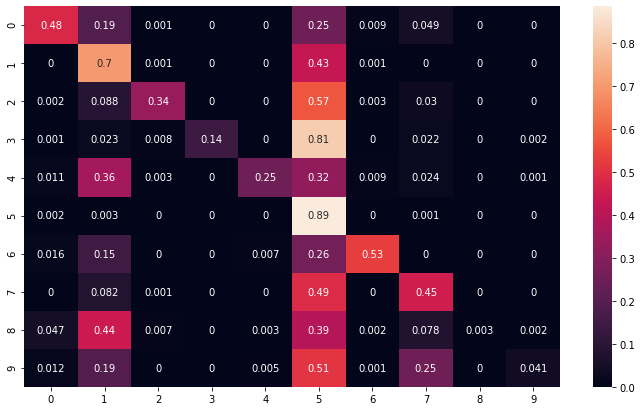

In [45]:
classes =('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
all_labels = torch.tensor(all_labels, device = 'cpu')
preds = torch.tensor(preds, device = 'cpu')
cf_matrix = confusion_matrix(all_labels, preds)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)